# Iterating through all patients in all years to find peep>5

In [1]:
import pandas as pd
from datetime import datetime
import os
import pickle
from datetime import timedelta
from datetime import datetime
from datetime import date
from datetime import time
from dateutil.relativedelta import relativedelta

import pandas as pd
import numpy as np
import os

import json

import sys
from scipy.io import loadmat

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
matplotlib.rc( 'savefig', facecolor = 'white' )
from matplotlib import pyplot
import matplotlib.ticker as plticker

import seaborn as sns
from matplotlib.cm import ScalarMappable


import sys
sys.path.append('../') # add this line so Data and data are visible in this file
sys.path.append('../../') # add this line so Data and data are visible in this file
sys.path.append('../PhysioMC/') # add this line so Data and data are visible in this file

# from PatchWand import *
from filters import *
from setting import *
# from preprocessing import *
from ECG_module import *
from dataIO import *
from evaluate import *
from stage1_PPG_analysis import *
from plotting_tools import *

from importlib import reload
%load_ext autoreload
%autoreload 2

In [2]:
# selected_id = 10

In [3]:
%pwd

'/labs/kamaleswaranlab/Sepsis3_062321/mchan_analysis/disparities_O2/repo/stage3_interrater_analysis'

In [91]:
%pip install statannot


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/rh/rh-python38/root/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [92]:
from statannot import add_stat_annotation


In [4]:
outputdir = '../../data/stage3/'
outputdir = '../../data/stage3(backup2)/'
if not os.path.exists(outputdir):
    os.makedirs(outputdir)

In [5]:
inputdir = '/labs/kamaleswaranlab/Sepsis3_062321/Files_cp_sftp_6_30_21/Files_cp_6_30_21/'

In [6]:
# demographic_filedir = '../../data/Pat_BedTime_List_some_on_BMI_2_6_22_dem.csv'

# df_demographic = pd.read_csv(demographic_filedir, index_col=0)  


In [7]:
# df_demographic.shape

In [8]:
df_demographic_processed = pd.read_csv(outputdir+'df_demographic_processed.csv.gz')  
df_demographic_processed.shape

(2372, 26)

In [9]:
df_demographic_processed.loc[:,'AE'] = np.abs(df_demographic_processed['spo2'] - df_demographic_processed['sao2'])
df_demographic_processed.loc[:,'bias'] = df_demographic_processed['spo2'] - df_demographic_processed['sao2']

In [10]:
df_demographic_processed = df_demographic_processed[df_demographic_processed['spo2']>=70]

In [11]:
df_demographic_processed

,deBedTime,DateStart,DateEnd,PAT_ID,BED_LOCATION_START,BED_LOCATION_END,White,Black,Race String,Time Difference,CSN Exist Flag,CSN,BED Time Difference,spo2,sao2,times,B2C,max2min,PI,std,skewness,kurtosis,rms,energy,mean,index,AE,bias
0,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,98.2,2017-11-06 19:56:00,1.590448,0.689426,0.170851,0.177300,-0.646509,0.008321,0.182199,7.544512,4.037583,1178,1.8,1.8
1,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,98.2,2017-11-06 20:56:00,1.505029,0.707002,0.174941,0.180221,-0.580532,-0.073419,0.185297,7.795070,4.035583,1179,1.8,1.8
2,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,98.2,2017-11-06 21:56:00,1.574055,0.749341,0.185914,0.189751,-0.551550,-0.070939,0.193322,8.641312,4.029156,1180,1.8,1.8
3,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,99.1,2017-11-06 22:56:00,1.770426,0.729601,0.180944,0.189265,-0.780377,-0.086663,0.191735,8.597125,4.018000,1181,0.9,0.9
4,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,99.1,2017-11-06 23:56:00,1.954453,0.758762,0.188151,0.202146,-0.775214,-0.263776,0.203901,9.807090,4.013396,1182,0.9,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,A083-0509476759,2017-10-31 19:05:59,2017-11-14 05:34:28,19887403.0,2017-10-31 13:09:27,2017-11-14 00:49:11,True,False,Caucasian or White,1864799.0,True,5.580096e+10,1165184.0,100.0,99.1,2017-11-01 08:06:00,12.187788,0.869248,0.218550,0.277658,-0.202305,-1.282745,0.278693,18.502542,3.979083,36006,0.9,0.9
2368,A083-0509476759,2017-10-31 19:05:59,2017-11-14 05:34:28,19887403.0,2017-10-31 13:09:27,2017-11-14 00:49:11,True,False,Caucasian or White,1864799.0,True,5.580096e+10,1165184.0,100.0,99.1,2017-11-01 09:06:00,10.498579,0.883021,0.220828,0.282050,-0.214797,-1.273521,0.282228,19.092521,3.999500,36007,0.9,0.9
2369,A083-0509476759,2017-10-31 19:05:59,2017-11-14 05:34:28,19887403.0,2017-10-31 13:09:27,2017-11-14 00:49:11,True,False,Caucasian or White,1864799.0,True,5.580096e+10,1165184.0,100.0,99.1,2017-11-01 12:06:00,13.597656,0.853070,0.213594,0.276538,-0.308489,-1.264902,0.276770,18.353636,4.000615,36010,0.9,0.9
2370,A083-0509476759,2017-10-31 19:05:59,2017-11-14 05:34:28,19887403.0,2017-10-31 13:09:27,2017-11-14 00:49:11,True,False,Caucasian or White,1864799.0,True,5.580096e+10,1165184.0,99.0,99.1,2017-11-01 14:06:00,21.725135,0.849123,0.212514,0.277398,-0.359267,-1.261197,0.277663,18.467943,3.998448,36012,0.1,-0.1


# What's in the rec_id folder 
    A043-0509992150_0037.mat: waveform data (ECG, PPG, resp. BP, etc.)
    A043-0509992150_0037.hea: header file of the waveform data (e.g. signal name, gain, unit, etc.)
    A043-0509992150_0037d.mat: header file of the waveform data in dictionary

    A043-0509992150_0000n.mat: vital sign data (HR, SpO2, etc.)
    A043-0509992150_0n.hea: header file of the vital sign  data
    A043-0509992150_0nd.mat: header file of the vital sign data in dictionary

# TODO: figure out what these are
    A043-0509992150_correction???
    A043-0509992150_layout.hea
    A043-0509992150.md5
    A043-0509992150.almth

In [12]:
feature_names = ['B2C', 'max2min', 'PI', 'std', 'skewness', 'kurtosis', 'rms', 'energy', 'mean']
label_names = ['White', 'Black', 'Race String', 'AE', 'bias', 'sao2', 'spo2', 'PAT_ID']

In [13]:
# X = df_demographic_processed[['B2C', 'max2min', 'PI', 'std', 'skewness', 'kurtosis', 'rms', 'energy', 'mean', 'White', 'Black', 'Race String', 'AE', 'bias']].copy()
X = df_demographic_processed[feature_names].copy()
Y = df_demographic_processed[label_names].copy()

In [14]:
X

,B2C,max2min,PI,std,skewness,kurtosis,rms,energy,mean
0,1.590448,0.689426,0.170851,0.177300,-0.646509,0.008321,0.182199,7.544512,4.037583
1,1.505029,0.707002,0.174941,0.180221,-0.580532,-0.073419,0.185297,7.795070,4.035583
2,1.574055,0.749341,0.185914,0.189751,-0.551550,-0.070939,0.193322,8.641312,4.029156
3,1.770426,0.729601,0.180944,0.189265,-0.780377,-0.086663,0.191735,8.597125,4.018000
4,1.954453,0.758762,0.188151,0.202146,-0.775214,-0.263776,0.203901,9.807090,4.013396
...,...,...,...,...,...,...,...,...,...
2367,12.187788,0.869248,0.218550,0.277658,-0.202305,-1.282745,0.278693,18.502542,3.979083
2368,10.498579,0.883021,0.220828,0.282050,-0.214797,-1.273521,0.282228,19.092521,3.999500
2369,13.597656,0.853070,0.213594,0.276538,-0.308489,-1.264902,0.276770,18.353636,4.000615
2370,21.725135,0.849123,0.212514,0.277398,-0.359267,-1.261197,0.277663,18.467943,3.998448


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
pca_features = PCA(n_components=3)


In [17]:
features = X.values
labels = Y.values

In [18]:
# col_name = list(X.iloc[:, :-3].columns)
# col_name

In [19]:
features.shape

(2366, 9)

In [20]:
features = StandardScaler().fit_transform(features) # normalizing the features
print('show standardize mean and std:', np.mean(features),np.std(features))



show standardize mean and std: 4.564771590681962e-16 1.0


In [21]:
principalComponents_features = pca_features.fit_transform(features)


In [22]:
# feature_weights[0]

Text(0.5, 1.0, '[PC2] feature contribution')

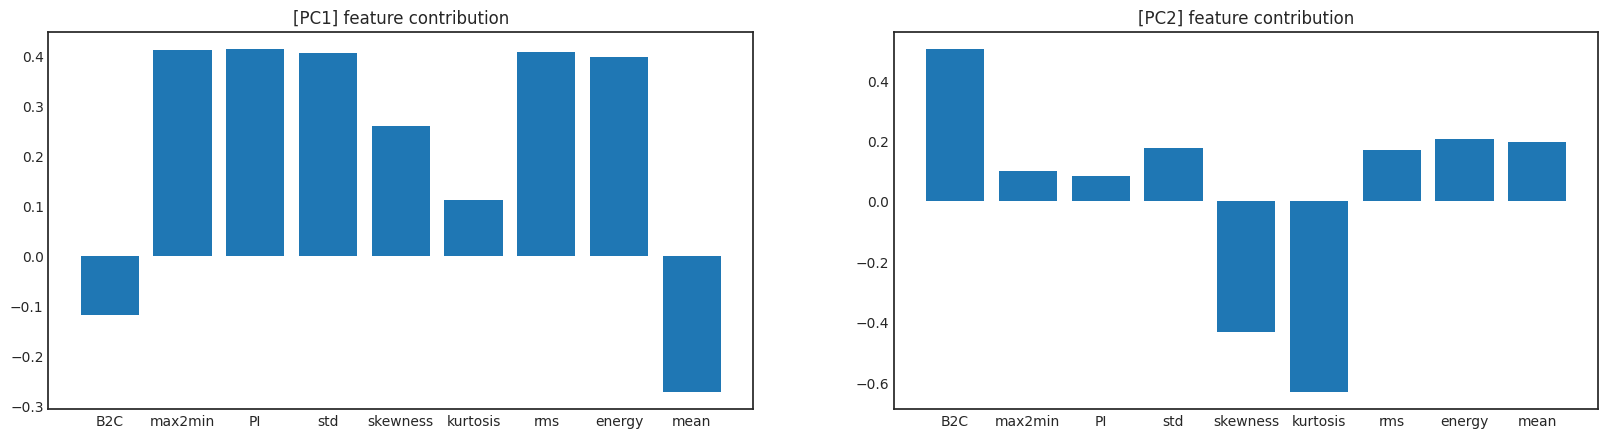

In [23]:
feature_weights = pca_features.components_
# import matplotlib.pyplot as plt
# # %matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5), dpi=100)
ax1.bar(feature_names,feature_weights[0])
ax1.set_title('[PC1] feature contribution')
ax2.bar(feature_names,feature_weights[1])
ax2.set_title('[PC2] feature contribution')


In [24]:
var_pca = np.cumsum(np.round(pca_features.explained_variance_ratio_, decimals=3)*100)
print('PCA var:', var_pca)
explained_var = var_pca[1]

PCA var: [63.2 79.9 89.1]


In [25]:
df_demographic_processed.loc[:,'PC1'] = principalComponents_features[:, 0]
df_demographic_processed.loc[:,'PC2'] = principalComponents_features[:, 1]
df_demographic_processed

,deBedTime,DateStart,DateEnd,PAT_ID,BED_LOCATION_START,BED_LOCATION_END,White,Black,Race String,Time Difference,CSN Exist Flag,CSN,BED Time Difference,spo2,sao2,times,B2C,max2min,PI,std,skewness,kurtosis,rms,energy,mean,index,AE,bias,PC1,PC2
0,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,98.2,2017-11-06 19:56:00,1.590448,0.689426,0.170851,0.177300,-0.646509,0.008321,0.182199,7.544512,4.037583,1178,1.8,1.8,-3.087419,-1.409288
1,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,98.2,2017-11-06 20:56:00,1.505029,0.707002,0.174941,0.180221,-0.580532,-0.073419,0.185297,7.795070,4.035583,1179,1.8,1.8,-3.036741,-1.364399
2,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,98.2,2017-11-06 21:56:00,1.574055,0.749341,0.185914,0.189751,-0.551550,-0.070939,0.193322,8.641312,4.029156,1180,1.8,1.8,-2.950279,-1.390698
3,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,99.1,2017-11-06 22:56:00,1.770426,0.729601,0.180944,0.189265,-0.780377,-0.086663,0.191735,8.597125,4.018000,1181,0.9,0.9,-3.116120,-1.079426
4,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,99.1,2017-11-06 23:56:00,1.954453,0.758762,0.188151,0.202146,-0.775214,-0.263776,0.203901,9.807090,4.013396,1182,0.9,0.9,-3.108577,-0.755261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,A083-0509476759,2017-10-31 19:05:59,2017-11-14 05:34:28,19887403.0,2017-10-31 13:09:27,2017-11-14 00:49:11,True,False,Caucasian or White,1864799.0,True,5.580096e+10,1165184.0,100.0,99.1,2017-11-01 08:06:00,12.187788,0.869248,0.218550,0.277658,-0.202305,-1.282745,0.278693,18.502542,3.979083,36006,0.9,0.9,-2.969231,1.716302
2368,A083-0509476759,2017-10-31 19:05:59,2017-11-14 05:34:28,19887403.0,2017-10-31 13:09:27,2017-11-14 00:49:11,True,False,Caucasian or White,1864799.0,True,5.580096e+10,1165184.0,100.0,99.1,2017-11-01 09:06:00,10.498579,0.883021,0.220828,0.282050,-0.214797,-1.273521,0.282228,19.092521,3.999500,36007,0.9,0.9,-2.954263,1.522717
2369,A083-0509476759,2017-10-31 19:05:59,2017-11-14 05:34:28,19887403.0,2017-10-31 13:09:27,2017-11-14 00:49:11,True,False,Caucasian or White,1864799.0,True,5.580096e+10,1165184.0,100.0,99.1,2017-11-01 12:06:00,13.597656,0.853070,0.213594,0.276538,-0.308489,-1.264902,0.276770,18.353636,4.000615,36010,0.9,0.9,-3.159129,2.051787
2370,A083-0509476759,2017-10-31 19:05:59,2017-11-14 05:34:28,19887403.0,2017-10-31 13:09:27,2017-11-14 00:49:11,True,False,Caucasian or White,1864799.0,True,5.580096e+10,1165184.0,99.0,99.1,2017-11-01 14:06:00,21.725135,0.849123,0.212514,0.277398,-0.359267,-1.261197,0.277663,18.467943,3.998448,36012,0.1,-0.1,-3.457845,3.249261


In [26]:
# X.loc[:,'MAE_SpO2'] = np.random.rand(X.shape[0])

In [27]:
# Y[['Race String', 'PAT_ID', 'AE', 'bias', 'sao2', 'spo2']]

In [28]:
def get_regression_stats(df_demographic_processed, verbose=False):

    estimated = df_demographic_processed['spo2']
    label = df_demographic_processed['sao2']

    bias = estimated - label
    RMSE = get_RMSE(label, estimated)
    MAE, _ = get_MAE(label, estimated)
    PCC = get_PCC(label, estimated)
    Rsquared = get_CoeffDeterm(label, estimated)


    N_sub = len(df_demographic_processed['PAT_ID'].unique())
    N_samples= df_demographic_processed.shape[0]

    N_White = df_demographic_processed[['PAT_ID', 'White']].drop_duplicates()['White'].sum()
    N_Black = df_demographic_processed[['PAT_ID', 'Black']].drop_duplicates()['Black'].sum()

    textstr = 'RMSE={:.2f}{}\nMAE={:.2f}{}\nPCC={:.2f}\nR2={:.2f}\nN_sub={} ({}W, {}B)\nN_samples={}'.format(
        RMSE, '%', MAE, '%',
        PCC, Rsquared,
        N_sub, N_White, N_Black,
        N_samples)

    if verbose:
        print(textstr)
    return textstr

In [29]:
# N_white = df_demographic_processed[['PAT_ID', 'White']].drop_duplicates()['White'].sum()

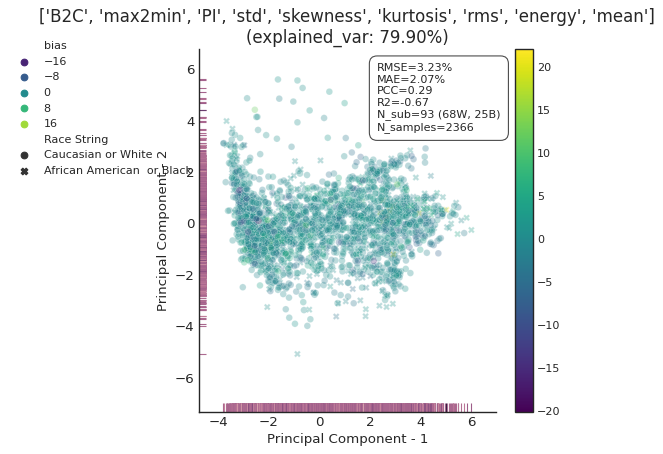

In [30]:
metric = 'bias'

fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=80)

ax.set_xlabel('Principal Component - 1',fontsize=12)
ax.set_ylabel('Principal Component - 2',fontsize=12)
ax.set_title('{}\n(explained_var: {:.2f}%)'.format(feature_names, explained_var),fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)

legend_dict = {
    0: 'White',
    1: 'Black',
}

# race_color_dict = {
#     'Caucasian or White': 'firebrick',
#     'African American  or Black': 'steelblue',
# }

# pt_label = ['']

marker = 'o'
# colors = 'r'
alpha = 0.3
fontsize = 15

# mask_White = df_demographic_processed['White']==True
# mask_Black = df_demographic_processed['Black']==True

markers = {"Caucasian or White": "o", "African American  or Black": "X"}
# sns.scatterplot(data=tips, x="total_bill", y="tip", style="time", markers=markers)



sns.scatterplot(data=df_demographic_processed, x="PC1", y="PC2", hue=metric, style="Race String", ax=ax, palette='viridis', markers=markers,alpha=alpha)
sns.rugplot(data=df_demographic_processed, x="PC1", y="PC2", hue=metric, ax=ax)


# title_str = '[{}]\n{} range: {:.1f}-{:.1f} {}'.format(subject_id, task.split('_')[0], label_range_sub[0], label_range_sub[1], unit_dict[task_name])

textstr = get_regression_stats(df_demographic_processed, verbose=False)
props = dict(boxstyle='round,pad=0.7', facecolor='white', edgecolor='black', alpha=0.7)

# place a text box in bottom right in axes coords
ax.text(0.6, 0.77, textstr, transform=ax.transAxes, fontsize=fontsize-5,
        verticalalignment='bottom', horizontalalignment='left', bbox=props)


#Colormap for comparison
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(df_demographic_processed[metric].min(), df_demographic_processed[metric].max())
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)



handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles=handles[-3:], labels=labels[-3:])
ax.legend(bbox_to_anchor= (.01, 1.05), prop={'size': fontsize-5})

ax_no_top_right(ax)


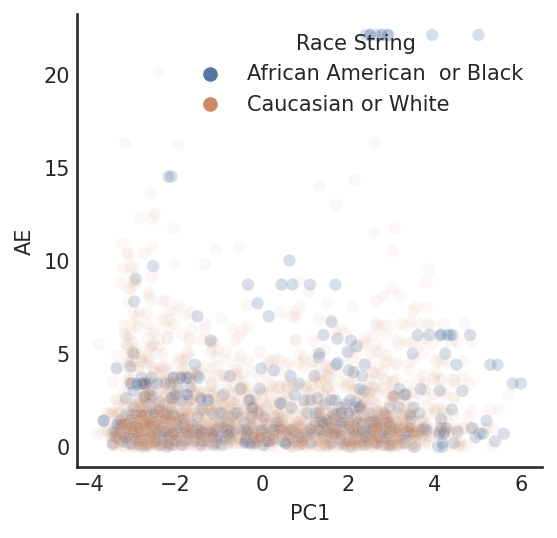

In [31]:
# fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=80)

fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=150)

N = df_demographic_processed.shape[0]

metric = 'AE'


df_black = df_demographic_processed[df_demographic_processed['Race String']=='African American  or Black']
df_white = df_demographic_processed[df_demographic_processed['Race String']=='Caucasian or White']

alpha_black = N/df_black.shape[0]/20
alpha_white = N/df_white.shape[0]/20

sns.scatterplot(data=df_black, x="PC1", y=metric, hue='Race String', ax=ax, palette=race_color_dict, markers=markers,alpha=alpha_black)
sns.scatterplot(data=df_white, x="PC1", y=metric, hue='Race String', ax=ax, palette=race_color_dict, markers=markers,alpha=alpha_white)

# ax.scatter()
# sns.scatterplot(data=df_demographic_processed, x="PC1", y='AE', hue='Race String', ax=ax, palette=race_color_dict, markers=markers,alpha=0.05)
ax_no_top_right(ax)


In [72]:
140/4

35.0

In [137]:
df_copy = df_demographic_processed.copy()
df_copy['PI'] = df_copy['PI']*100

# df_PI = df_demographic_processed['PI'].copy()
df_PI_grouped = df_copy['PI'].copy()
df_PI_grouped[(df_copy['PI']>=0) & (df_copy['PI']<47)] = 'PI∈[0-47)'
df_PI_grouped[(df_copy['PI']>=47) & (df_copy['PI']<93)] = 'PI∈[47-93)'
df_PI_grouped[(df_copy['PI']>=93) & (df_copy['PI']<140)] = 'PI∈[93-140)'
# df_PI_grouped[(df_copy['PI']>=0) & (df_copy['PI']<35)] = 'PI:0-35'
# df_PI_grouped[(df_copy['PI']>=35) & (df_copy['PI']<70)] = 'PI:35-70'
# df_PI_grouped[(df_copy['PI']>=70) & (df_copy['PI']<105)] = 'PI:70-105'
# df_PI_grouped[(df_copy['PI']>=105) & (df_copy['PI']<140)] = 'PI:105-140'

df_copy['PI_group'] = df_PI_grouped

In [122]:
race_color_dict

{'Caucasian or White': '#cc8963', 'African American  or Black': '#5975a4'}

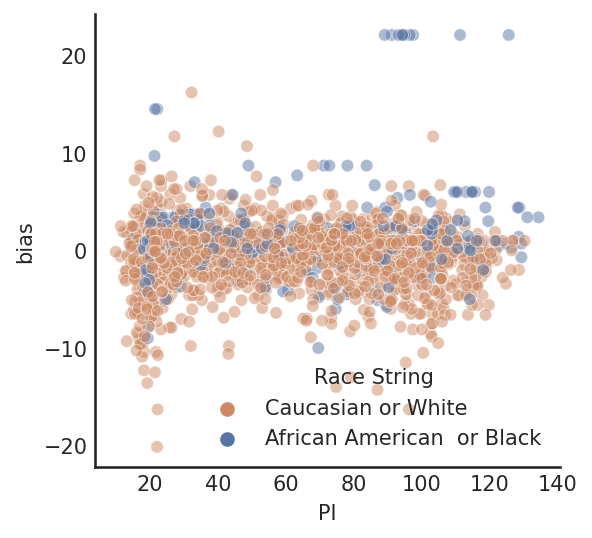

In [123]:
metric = 'bias'
faeture_name = 'PI'
alpha = 0.5
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=150)
# df_copy = df_demographic_processed.copy()
sns.scatterplot(data=df_copy, x=faeture_name, y=metric, hue="Race String", ax=ax, palette=race_color_dict,alpha=alpha)
ax_no_top_right(ax)


In [124]:
df_copy['PI_group'].unique()

array(['PI:0-35', 'PI:35-70', 'PI:70-105', 'PI:105-140'], dtype=object)

In [125]:
race_color_dict

{'Caucasian or White': '#cc8963', 'African American  or Black': '#5975a4'}

In [126]:
df_copy

,deBedTime,DateStart,DateEnd,PAT_ID,BED_LOCATION_START,BED_LOCATION_END,White,Black,Race String,Time Difference,CSN Exist Flag,CSN,BED Time Difference,spo2,sao2,times,B2C,max2min,PI,std,skewness,kurtosis,rms,energy,mean,index,AE,bias,PC1,PC2,PI_group
0,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,98.2,2017-11-06 19:56:00,1.590448,0.689426,17.085063,0.177300,-0.646509,0.008321,0.182199,7.544512,4.037583,1178,1.8,1.8,-3.087419,-1.409288,PI:0-35
1,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,98.2,2017-11-06 20:56:00,1.505029,0.707002,17.494104,0.180221,-0.580532,-0.073419,0.185297,7.795070,4.035583,1179,1.8,1.8,-3.036741,-1.364399,PI:0-35
2,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,98.2,2017-11-06 21:56:00,1.574055,0.749341,18.591435,0.189751,-0.551550,-0.070939,0.193322,8.641312,4.029156,1180,1.8,1.8,-2.950279,-1.390698,PI:0-35
3,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,99.1,2017-11-06 22:56:00,1.770426,0.729601,18.094395,0.189265,-0.780377,-0.086663,0.191735,8.597125,4.018000,1181,0.9,0.9,-3.116120,-1.079426,PI:0-35
4,A043-0509992150,2017-11-06 18:15:50,2017-12-06 16:29:13,94166433.0,2017-11-06 13:13:34,2017-12-05 19:00:00,True,False,Caucasian or White,105590.0,True,4.991014e+10,2526386.0,100.0,99.1,2017-11-06 23:56:00,1.954453,0.758762,18.815126,0.202146,-0.775214,-0.263776,0.203901,9.807090,4.013396,1182,0.9,0.9,-3.108577,-0.755261,PI:0-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,A083-0509476759,2017-10-31 19:05:59,2017-11-14 05:34:28,19887403.0,2017-10-31 13:09:27,2017-11-14 00:49:11,True,False,Caucasian or White,1864799.0,True,5.580096e+10,1165184.0,100.0,99.1,2017-11-01 08:06:00,12.187788,0.869248,21.854993,0.277658,-0.202305,-1.282745,0.278693,18.502542,3.979083,36006,0.9,0.9,-2.969231,1.716302,PI:0-35
2368,A083-0509476759,2017-10-31 19:05:59,2017-11-14 05:34:28,19887403.0,2017-10-31 13:09:27,2017-11-14 00:49:11,True,False,Caucasian or White,1864799.0,True,5.580096e+10,1165184.0,100.0,99.1,2017-11-01 09:06:00,10.498579,0.883021,22.082813,0.282050,-0.214797,-1.273521,0.282228,19.092521,3.999500,36007,0.9,0.9,-2.954263,1.522717,PI:0-35
2369,A083-0509476759,2017-10-31 19:05:59,2017-11-14 05:34:28,19887403.0,2017-10-31 13:09:27,2017-11-14 00:49:11,True,False,Caucasian or White,1864799.0,True,5.580096e+10,1165184.0,100.0,99.1,2017-11-01 12:06:00,13.597656,0.853070,21.359449,0.276538,-0.308489,-1.264902,0.276770,18.353636,4.000615,36010,0.9,0.9,-3.159129,2.051787,PI:0-35
2370,A083-0509476759,2017-10-31 19:05:59,2017-11-14 05:34:28,19887403.0,2017-10-31 13:09:27,2017-11-14 00:49:11,True,False,Caucasian or White,1864799.0,True,5.580096e+10,1165184.0,99.0,99.1,2017-11-01 14:06:00,21.725135,0.849123,21.251402,0.277398,-0.359267,-1.261197,0.277663,18.467943,3.998448,36012,0.1,-0.1,-3.457845,3.249261,PI:0-35


In [127]:
race_color_dict

{'Caucasian or White': '#cc8963', 'African American  or Black': '#5975a4'}

In [133]:
np.unique(df_copy[faeture_name])

array(['PI:0-35', 'PI:105-140', 'PI:35-70', 'PI:70-105'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PI∈[47-93)_Caucasian or White v.s. PI∈[47-93)_African American  or Black: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.874e-04 U_stat=4.762e+04
PI∈[0-47)_Caucasian or White v.s. PI∈[0-47)_African American  or Black: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.796e-14 U_stat=6.596e+04
PI∈[93-140)_Caucasian or White v.s. PI∈[93-140)_African American  or Black: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.775e-13 U_stat=8.782e+03
PI∈[0-47)_Caucasian or White v.s. PI∈[93-140)_Caucasian or White: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.480e-02 U_stat=1.592e+05
PI∈[0-47)_African American  or Black v.s. PI∈[93-140)_African American  or Black: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.0

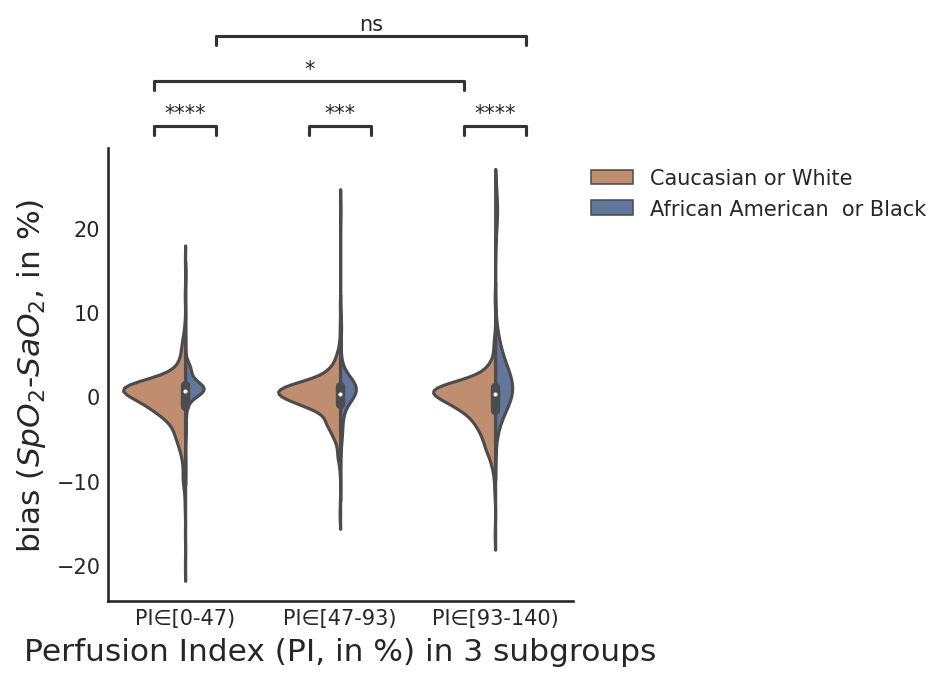

In [142]:
metric = 'bias'
faeture_name = 'PI_group'
hue = "Race String"
alpha = 0.5
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=150)
# df_copy = df_demographic_processed.copy()
# df_copy[faeture_name] = df_copy[faeture_name]*100
# sns.boxplot(data=df_copy, x=faeture_name, y=metric, hue=hue, ax=ax, palette=race_color_dict)
sns.violinplot(data=df_copy, x=faeture_name, y=metric, hue=hue, ax=ax, palette=race_color_dict, split=True, scale="count")

order = np.unique(df_copy[faeture_name])
# box_pairs = [( ("PI:0-35", "Caucasian or White"), ("PI:0-35", "African American  or Black") ),
#              ( ("PI:35-70", "Caucasian or White"), ("PI:35-70", "African American  or Black") ),
#              ( ("PI:70-105", "Caucasian or White"), ("PI:70-105", "African American  or Black") ),
#              ( ("PI:105-140", "Caucasian or White"), ("PI:105-140", "African American  or Black") ),
#              ( ("PI:0-35", "Caucasian or White"), ("PI:105-140", "Caucasian or White") ),
#              ( ("PI:0-35", "African American  or Black"), ("PI:105-140", "African American  or Black") ),
             
#             ]
box_pairs = [( ("PI∈[0-47)", "Caucasian or White"), ("PI∈[0-47)", "African American  or Black") ),
             ( ("PI∈[47-93)", "Caucasian or White"), ("PI∈[47-93)", "African American  or Black") ),
             ( ("PI∈[93-140)", "Caucasian or White"), ("PI∈[93-140)", "African American  or Black") ),
             ( ("PI∈[0-47)", "Caucasian or White"), ("PI∈[93-140)", "Caucasian or White") ),
             ( ("PI∈[0-47)", "African American  or Black"), ("PI∈[93-140)", "African American  or Black") ),
            ]

ax.set_xlabel('Perfusion Index (PI, in %) in 3 subgroups', fontsize=fontsize)
ax.set_ylabel(r'bias ($SpO_{2}$-$SaO_{2}$, in %)', fontsize=fontsize)

test_results = add_stat_annotation(ax, data=df_copy, x=faeture_name, y=metric, hue=hue,
                                   box_pairs=box_pairs,
                                   test='Mann-Whitney', text_format='star',
                                   loc='outside', verbose=2)
test_results


ax_no_top_right(ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))


ModuleNotFoundError: No module named 'statannot'

/opt/rh/rh-python38/root/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


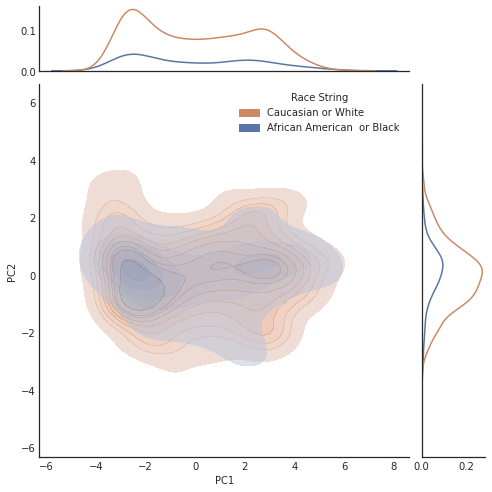

In [153]:
# fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=150)

j_handle = sns.jointplot(
    ax=ax,
    data=df_demographic_processed,
    x="PC1", y="PC2", hue='Race String',
    palette=race_color_dict,
    shade=True, shade_lowest=False, 
    alpha=0.5,
    kind="kde",
    marginal_ticks=True,

    height=7
)

In [152]:
# j_handle

In [38]:
# df = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/MASS/nlschools.csv", index_col=0)
# sns.pairplot(df, hue="COMB")


In [39]:
df_ox_analysis = df_demographic_processed[df_demographic_processed['spo2']>=70]

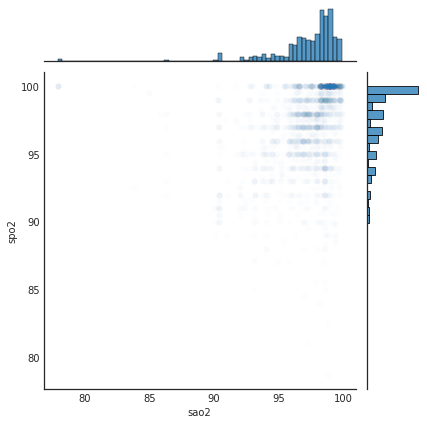

In [41]:
sns.jointplot(data=df_ox_analysis, x="sao2", y="spo2", alpha=0.01)


In [ ]:
# handles, labels[-3:]

# UMAP analysis

In [ ]:
!{sys.executable} -m pip install umap-learn

In [ ]:
import umap


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [ ]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


In [ ]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins.head()

In [ ]:
penguins = penguins.dropna()
penguins.species_short.value_counts()

In [ ]:
sns.pairplot(penguins, hue='species_short')


In [ ]:
reducer = umap.UMAP()

In [ ]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [ ]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

In [ ]:
X

In [ ]:
features = X.values
labels = Y.values

In [ ]:
features.shape

In [ ]:
features = StandardScaler().fit_transform(features) # normalizing the features


print('show standardize mean and std:', np.mean(features),np.std(features))



In [ ]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(features)


In [ ]:
embedding.shape, df_demographic_processed.shape

In [ ]:
df_demographic_processed.loc[:,'UMAP1'] = embedding[:, 0]
df_demographic_processed.loc[:,'UMAP2'] = embedding[:, 1]
df_demographic_processed

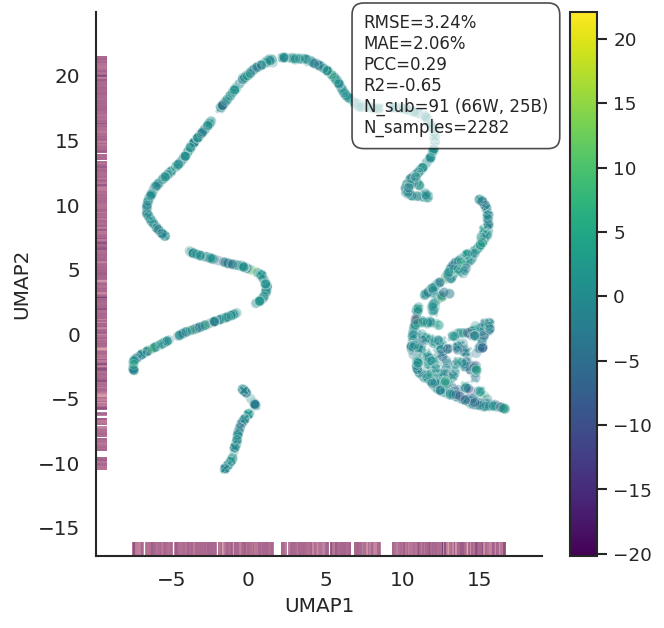

In [226]:
metric = 'bias'

dim1_name = 'UMAP1'
dim2_name = 'UMAP2'

fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=120)

ax.set_xlabel(dim1_name,fontsize=12)
ax.set_ylabel(dim2_name,fontsize=12)
# ax.set_title('{}\n(explained_var: {:.2f}%)'.format(feature_names, explained_var),fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)


# race_color_dict = {
#     'Caucasian or White': 'firebrick',
#     'African American  or Black': 'steelblue',
# }





# pt_label = ['']

marker = 'o'
# colors = 'r'
alpha = 0.3
fontsize = 15

# mask_White = df_demographic_processed['White']==True
# mask_Black = df_demographic_processed['Black']==True

markers = {"Caucasian or White": "o", "African American  or Black": "X"}
# sns.scatterplot(data=tips, x="total_bill", y="tip", style="time", markers=markers)



g = sns.scatterplot(data=df_demographic_processed, x=dim1_name, y=dim2_name, hue=metric, style="Race String", ax=ax, palette='viridis', markers=markers,alpha=alpha)
sns.rugplot(data=df_demographic_processed, x=dim1_name, y=dim2_name, hue=metric, ax=ax)
g.legend_.remove()


# title_str = '[{}]\n{} range: {:.1f}-{:.1f} {}'.format(subject_id, task.split('_')[0], label_range_sub[0], label_range_sub[1], unit_dict[task_name])

textstr = get_regression_stats(df_demographic_processed, verbose=False)
props = dict(boxstyle='round,pad=0.7', facecolor='white', edgecolor='black', alpha=0.7)

# place a text box in bottom right in axes coords
ax.text(0.6, 0.77, textstr, transform=ax.transAxes, fontsize=fontsize-5,
        verticalalignment='bottom', horizontalalignment='left', bbox=props)


#Colormap for comparison
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(df_demographic_processed[metric].min(), df_demographic_processed[metric].max())
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)



# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(handles=handles[-3:], labels=labels[-3:])
# ax.legend(bbox_to_anchor= (.01, 1.05), prop={'size': fontsize-5})

ax_no_top_right(ax)
plt.show()

In [ ]:
# handles, labels  =  ax.get_legend_handles_labels()
# handles, labels 

/opt/rh/rh-python38/root/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


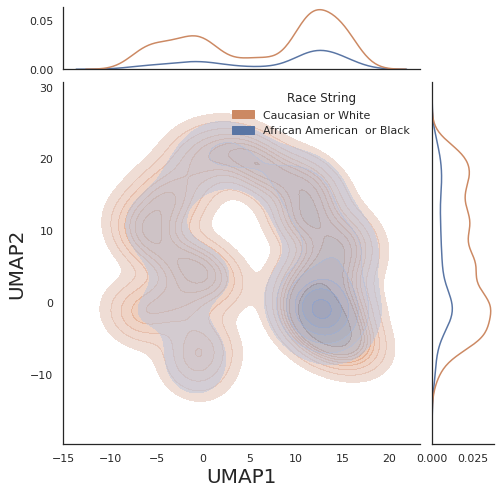

In [227]:
fontsize = 20

j_handle = sns.jointplot(
    data=df_demographic_processed,
    x=dim1_name, y=dim2_name, hue='Race String',
    palette=race_color_dict,
    shade=True, shade_lowest=False, 
    alpha=0.5,
    kind="kde",
    
    height=7,
    marginal_ticks=True
)

# JointGrid has a convenience function
j_handle.set_axis_labels(dim1_name, dim2_name, fontsize=fontsize)

In [222]:
feature_names

['B2C',
 'max2min',
 'PI',
 'std',
 'skewness',
 'kurtosis',
 'rms',
 'energy',
 'mean']

In [ ]:
# df_pair = df_demographic_processed[['sao2', 'bias'] + feature_names]

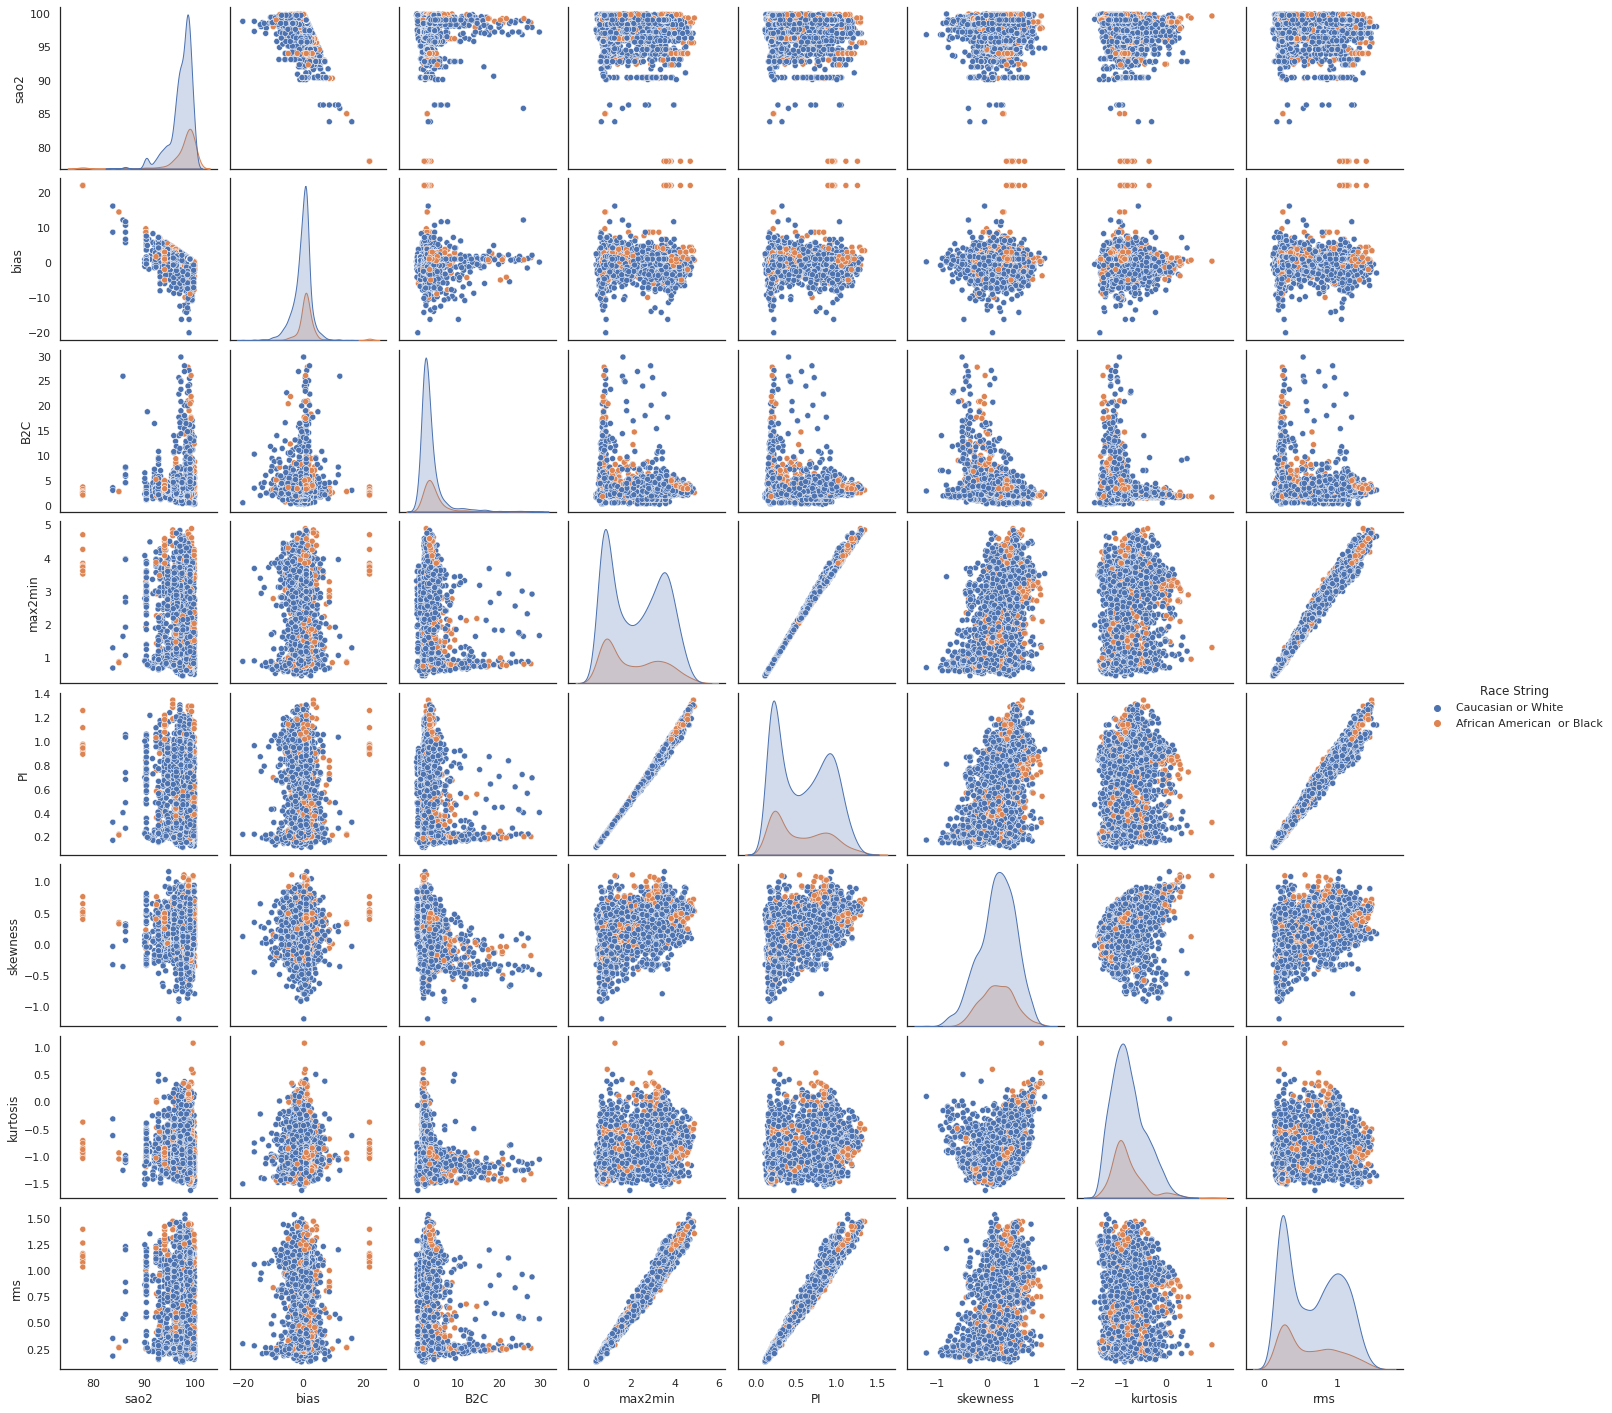

In [224]:
hue_name = 'Race String'
sns.pairplot(df_demographic_processed[['sao2', 'bias', hue_name, 'B2C', 'max2min', 'PI','skewness','kurtosis','rms']], hue=hue_name)


In [ ]:
sys.exit()

In [ ]:
beats = beats_dict['SPO2']

plt.plot(beats, color='gray', alpha=0.1)
plt.plot(beats.mean(axis=1), color='red', alpha=0.7)
# plt.ylim(-1,1)
plt.show()

beats = beats_dict['SPO2'][:, mask_all]

plt.plot(beats, color='gray', alpha=0.1)
plt.plot(beats.mean(axis=1), color='red', alpha=0.7)
# plt.ylim(-1,1)
plt.show()

In [ ]:
feature_names = list(df_features_sub.keys())
feature_names.remove('i_R_peak')


# feature_names

In [ ]:
# sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")

fig, axes = plt.subplots(len(feature_names),1, figsize=(5,20), dpi=80)

for ax, feature_name in zip(axes, feature_names):
# sns.violinplot(x=df_features["B2C"], ax=axes[0], orient='v')
# sns.violinplot(x=df_features["PI"], ax=axes[1], orient='v')

    sns.violinplot(data=df_features_sub, y=feature_name, ax=ax)
# sns.violinplot(data=df_features_sub, y="PI", ax=axes[1])


In [ ]:
df_features_sub.keys()

In [ ]:
plt.plot(df_features_sub['rms'].values)

In [ ]:
np.median(df_features_sub['max2min'].values)

In [ ]:

# np.prod(mask_feature_list, axis=1)

In [ ]:
mask_feature_list.shape

In [ ]:
aaa = np.asarray([[ True,  True,  True, True],
       [ True,  False,  True, True],
       [ True,  True,  True, True]])

aaa

In [ ]:
np.prod(aaa, axis=1)

In [ ]:
mask_feature_list.shape

In [ ]:
# np.stack(mask_feature_list).T
# aaa = np.asarray([[1.,2.],[3.,4.]])
# np.prod(aaa, axis=0), aaa

In [ ]:
FQI_dict

In [ ]:
FQI_dict = get_FQI_dict(df_features['B2C'].values)
plt.plot(FQI_dict['FQI'])

In [ ]:
plt.plot(ECG)
plt.xlim(0,1000)

In [ ]:
t_ecg = np.arange(ECG.shape[0])/Fs
hr_interp = np.interp(t_ecg, QRS_detector_dict['ts_hr'], QRS_detector_dict['hr'])

# plt.plot(t_ecg, hr_interp)
plt.plot(QRS_detector_dict['ts_hr'], QRS_detector_dict['hr'])
plt.xlim(0, 100)

In [ ]:
# plt.plot(t_ecg, ECG)
# plt.xlim(0, 500)

In [ ]:
# plt.plot(t_ecg, ECG)
# plt.xlim(300, 350)

In [ ]:
# plt.plot(t_ecg[::10], hr_interp[::10])
# plt.xlim(0, 1000)

In [ ]:
# def get_filt_df(df_sync, Fs):
#     df = df_sync.copy()

#     for sig_name in df.columns:
#         if 'I' == sig_name or 'II' == sig_name or 'III' == sig_name or 'V' == sig_name:
#             df[sig_name] = get_padded_filt(df[sig_name].values, filter_padded=1, lowcutoff=FILT_ECG[0], highcutoff=FILT_ECG[1], Fs=Fs)
#         elif 'RR' == sig_name:
#             df[sig_name] = get_padded_filt_DSwrapper(df[sig_name].values, filter_padded=1, lowcutoff=FILT_RESP[0], highcutoff=FILT_RESP[1], Fs=Fs)
#         elif 'SPO2' == sig_name:
#             df[sig_name] = get_padded_filt(df[sig_name].values, filter_padded=1, lowcutoff=FILT_PPG[0], highcutoff=FILT_PPG[1], Fs=Fs)
#         else:
#             pass

#     return df


In [ ]:

# beats_dict = segment_df(df_seg, QRS_detector_dict, Fs)
# use_ensemble = True


In [ ]:
# if use_ensemble:
#     for key in beats_dict:
#         if 'ppg' not in key:
#             continue
#         sig_beats = beats_dict[key]
#         beats_dict[key] = get_ensemble_beats(sig_beats, N_enBeats=4, use_woody=False)

In [ ]:
beats_dict.keys()

In [ ]:
beats_id = [1,2,3,4,5,6]
beats_names = ['I', 'II', 'III', 'V', 'SPO2', 'PPG_DC']
unit_dict['PPG_DC'] = ''

def plot_ALL_beats(beats_dict, beats_id, subject_id, Fs, show_good=None, fig_name=None, outputdir=None, show_plot=False):

    t_beat = np.arange(beats_dict['I'].shape[0])/Fs

    fig = plt.figure(figsize=(16, 10), dpi=80)
    fontsize = 20
    alpha = 0.03


    # for (beat_name, beat_i) in zip(beats_dict, beats_id):
    for (beat_name, beat_i) in zip(beats_names, beats_id):

        beats = beats_dict[beat_name]

        ax = fig.add_subplot(3, 4, beat_i)
        ax.set_title(beat_name+'\n', fontsize=fontsize)

        show_good = True
        if show_good is not None:


            template = beats_dict[beat_name].mean(axis=1)
            if beat_name=='SPO2':
                mask_all, ol_rate = clean_PPG(beats, template, Fs)
                ax.set_title(beat_name+'\nacception_rate:{:.2f}'.format(1-ol_rate), fontsize=fontsize)

            # if 'ppg' in beat_name:

    #             # if beat_name[-1]=='1':
    #                 template = beats_dict['ppg_r_1'].mean(axis=1)
    #             elif beat_name[-1]=='2':
    #                 template = beats_dict['ppg_r_1'].mean(axis=1)

    #             mask_all, ol_rate = clean_PPG(beats, template, Fs)
    #             if show_good==False:
    #                 beats = beats[:, ~mask_all]
    # #                     print(beat_name, ol_rate)
    #                 ax.set_title(beat_name+'\nrejection_rate:{:.2f}'.format(ol_rate), fontsize=fontsize)
    #             else:
    #                 beats = beats[:, mask_all]
    # #                     print(beat_name, ol_rate)
    #                 ax.set_title(beat_name+'\nacception_rate:{:.2f}'.format(1-ol_rate), fontsize=fontsize)



        ax.plot(t_beat, beats, color='gray', alpha=alpha)
        ax.plot(t_beat, np.mean(beats,axis=1), color='firebrick', linewidth=3)

        if 'SPO2' in beat_name or 'I' == beat_name or 'II' == beat_name or 'III' == beat_name or 'V' == beat_name:
            beats_mean = np.mean(beats,axis=1)

            ymin = beats_mean.mean() - beats_mean.std()*5
            ymax = beats_mean.mean() + beats_mean.std()*5
            ax.set_ylim(ymin, ymax)

        ax.tick_params(axis='both', which='major', labelsize=13)
        ax.set_ylabel(unit_dict[beat_name], fontsize=fontsize-3)
        ax.set_xlabel('time (sec)', fontsize=fontsize)



    fig.tight_layout()

    # if outputdir is not None:

    #     if fig_name is None:
    #         fig_name = 'beats_ensemble_sub{}'.format(subject_id)

    #     if not os.path.exists(outputdir):
    #         os.makedirs(outputdir)
    #     fig.savefig(outputdir + fig_name+'.png', transparent=False)

    # if show_plot == False:
    #     plt.close(fig)
    #     pyplot.close(fig)
    #     plt.close('all')


    # #     if log_wandb:
    # #         wandb.log({fig_name: wandb.Image(fig)})



In [ ]:
df_features

In [ ]:
plt.plot(df_features['PI'].values)

In [ ]:
debug_B2C(beats_PPG, Fs)


In [ ]:
data = df_features['B2C'].values
FQI_dict = get_FQI_dict(data)
plt.plot(FQI_dict['FQI'])

In [ ]:
df_features

In [ ]:
data = df_features['PI'].values
FQI_dict = get_FQI_dict(data)
plt.plot(FQI_dict['FQI'])

In [ ]:
data = df_features['max2min'].values
FQI_dict = get_FQI_dict(data)
plt.plot(FQI_dict['FQI'])

In [ ]:
feature_names!='i_R_peak'

In [ ]:
feature_names

In [ ]:
feature_names = df_features.columns
feature_names = feature_names[feature_names!='i_R_peak']
N_feature = feature_names.shape[0]

In [ ]:
df_seg

In [ ]:
fig, (axes) = plt.subplots(N_feature+2, 1, figsize=(20,8), dpi=100)

t_sig = df_seg['time'].values
t_sig = t_sig-t_sig[0]

ax1= axes[0]
ax1.plot(t_sig, df_seg['SPO2'].values)
ax1.set_ylabel('PPG')

ax2= axes[1]
ax2.plot(t_sig, df_seg['RR'].values)
ax2.set_ylabel('RR')

for i, feature_name in enumerate(feature_names):
    ax = axes[i+2]
    # ax2.scatter(beats_dict['i_R_peaks'][mask_feature], features_B2C[mask_feature])
    data = df_features[feature_name].values
    FQI_dict = get_FQI_dict(data)
    mask_feature = FQI_dict['mask_feature']
    ax.plot(df_features['i_R_peak'][mask_feature&mask_all]/Fs, df_features[feature_name][mask_feature&mask_all])
    ax.scatter(df_features['i_R_peak'][mask_feature&mask_all]/Fs, df_features[feature_name][mask_feature&mask_all])
    ax.set_ylabel(feature_name)

ax.set_xlabel('time (s)')
fig.tight_layout()


In [ ]:
beats_dict['i_R_peaks'].shape, features_B2C.shape

In [ ]:
sig_plt

In [ ]:
t_start = 1100
t_end = 1150

df_seg = df[(df['time']>=t_start) & (df['time']<=t_end)].copy()

t_arr = df_seg['time'].values
#     t_arr = t_arr - t_arr[0]

t_start = t_arr[0]
t_end = t_arr[-1]

sig_name = 'SPO2'
sig_plt = df_seg[sig_name].values


sig_plt = get_padded_filt(sig_plt, filter_padded=5, lowcutoff=1, highcutoff=4, Fs=Fs)

# t_arr = df_seg['time'].values
alpha=0.5
fig, ax = plt.subplots(1, 1, figsize=(25,10), gridspec_kw = {'wspace':0, 'hspace':0}, dpi=80)
ax.plot(t_arr, sig_plt, alpha=alpha ,zorder=1, linewidth=linewidth)
# ax.set_ylim(-5,5)

In [ ]:
unit_dict

In [ ]:
homedir = os.path.expanduser('~')+'/'

In [ ]:
inputdir = homedir+'kamaleswaranlab/Sepsis3_062321/Files_cp_sftp_6_30_21/Files_cp_6_30_21/'

In [ ]:
for sub_file in os.listdir(inputdir):
    # print(sub_file)
    pass

In [ ]:
sub_id = 'A071-0512777549'

In [ ]:
for sub_file in os.listdir(inputdir+sub_id):
    if 'hea' in sub_file:
        print(sub_file)